In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
dataset = pd.read_csv('classification_data/Social_Network_Ads.csv').values
print(dataset)

[[   19 19000     0]
 [   35 20000     0]
 [   26 43000     0]
 ...
 [   50 20000     1]
 [   36 33000     0]
 [   49 36000     1]]


In [13]:
X = dataset[:,:-1]
y = dataset[:,-1]

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=10)

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_sc = sc.transform(X_train)

### SVM

In [16]:
from sklearn.svm import SVC
svm_linear = SVC(kernel='linear',C=1)
svm_rbf = SVC(kernel='rbf',C=1)
svm_linear.fit(X_train_sc,y_train)
svm_rbf.fit(X_train_sc,y_train)

SVC(C=1)

In [17]:
# svm_linear와 svm_rbf의 test 데이터에 대한 예측값 구하기 (predict)
# ※ 학습과정에서 scaling을 했으므로, X_test도 scaling 해야 함
X_test_sc = sc.transform(X_test)
y_pred_linear = svm_linear.predict(X_test_sc)
y_pred_rbf = svm_rbf.predict(X_test_sc)

In [18]:
# svm_linear와 svm_rbf의 test 데이터에 대한 accuracy 구하기 (accuracy_score)
from sklearn.metrics import accuracy_score
acc_linear = accuracy_score(y_test,y_pred_linear)
acc_rbf = accuracy_score(y_test,y_pred_rbf)
print('Linear SVM accuracy: ', acc_linear*100)
print('RBF SVM accuracy: ', acc_rbf*100)

Linear SVM accuracy:  90.0
RBF SVM accuracy:  94.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


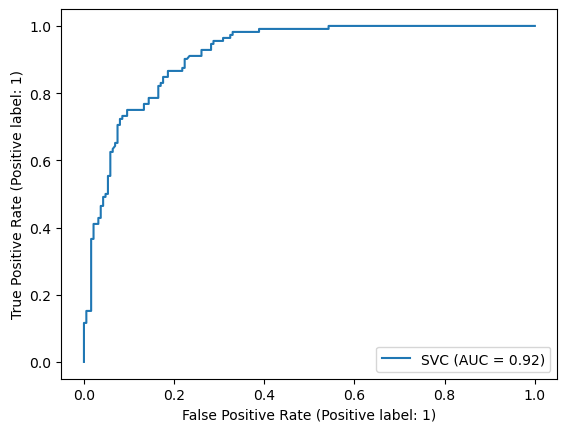

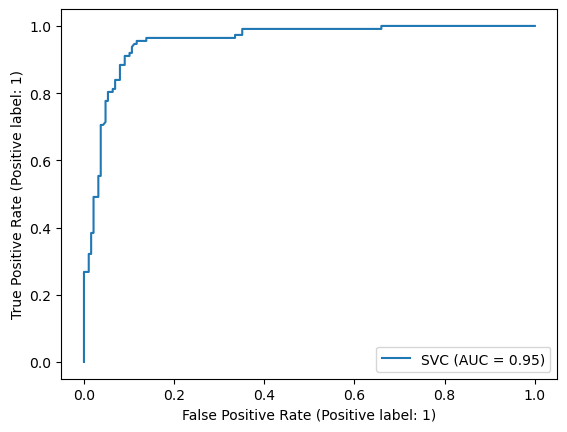

In [19]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(svm_linear,X_train_sc,y_train)
plot_roc_curve(svm_rbf,X_train_sc,y_train)